# project 12 :
# Insurance Claim
## Ariel Zagury
### data location: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health
### data origen: https://data.world/sumitrock/insurance



### Index: This column likely represents a unique identifier for each record in the dataset.

### PatientID: This column likely contains an identifier for each patient in the dataset.

### Age: This column contains the age of each patient.

### Gender: This column indicates the gender of each patient.

### BMI: BMI stands for Body Mass Index, and this column likely contains the BMI value for each patient, which is a measure of body fat based on height and weight.

#### BMI <18.5 underweight.
#### 18.5<BMI<25 is normal

#### 25<BMI<30 overweight.

#### 30<BMI obesity

### Blood Pressure: This column contains the blood pressure measurements for each patient at rest.
#### 110-140 high blood pressure.

#### Up to 110 is fine.

### Diabetic: This column indicates whether each patient is diabetic or not, possibly with a binary value (Yes/No).

### Children: This column represents the number of children each patient has.

### Smoker: This column indicates whether each patient is a smoker or not, possibly with a binary value (Yes/No).

### Region: This column likely contains the region or geographical area to which each patient belongs.

### Claim: This column contains the amount of the insurance claim for each patient.

# Central questions:
### 1. Is there a relationship between the owner's age and the amount of insurance claims?
### 2. Are there differences in the amount of insurance claims between smokers and non-smokers? 
### 3. Is there a difference in the amount of insurance claims between BMI types?
### 4. Is there a difference in the amount of insurance claims between men and women?

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
Url_data = "https://raw.githubusercontent.com/ArielZagury/project1/main/insurance_data.csv"
data = pd.read_csv(Url_data)

In [3]:
data.head() 

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
data.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [5]:
data.shape

(1340, 11)

In [6]:
data.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [8]:
data.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [9]:
data.dropna()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [10]:
data.describe().transpose().dropna()

,count,mean,std,min,25%,50%,75%,max
index,1340.0,669.500000,386.968991,0.00,334.750,669.500,1004.250,1339.00
PatientID,1340.0,670.500000,386.968991,1.00,335.750,670.500,1005.250,1340.00
age,1335.0,38.078652,11.102924,18.00,29.000,38.000,47.000,60.00
bmi,1340.0,30.668955,6.106735,16.00,26.275,30.400,34.700,53.10
bloodpressure,1340.0,94.157463,11.434712,80.00,86.000,92.000,99.000,140.00
children,1340.0,1.093284,1.205334,0.00,0.000,1.000,2.000,5.00
claim,1340.0,13252.745642,12109.609288,1121.87,4719.685,9369.615,16604.305,63770.43


# Central question 1:
#### Is there a relationship between the owner's age and the amount of insurance claims?

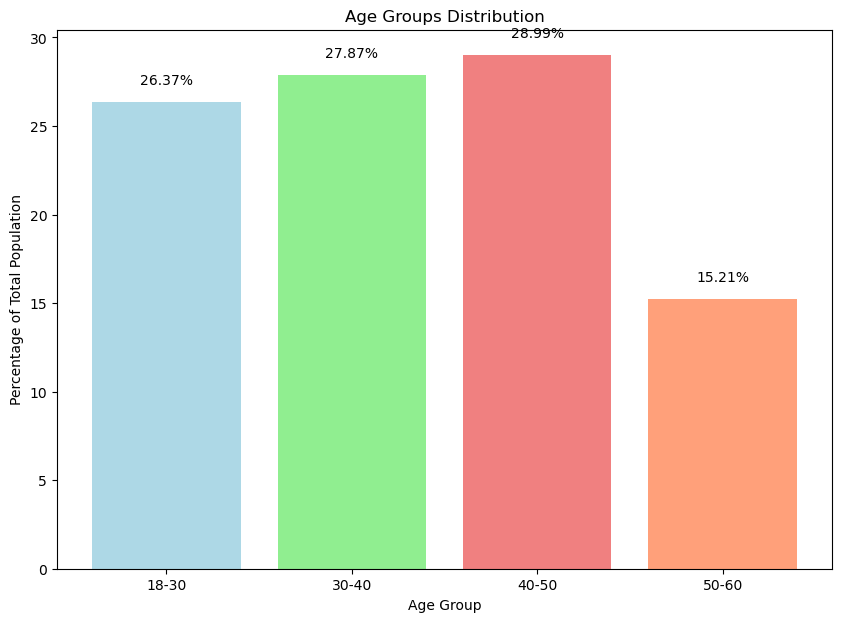

In [11]:
age_ranges = [(18, 30), (30, 40), (40, 50), (50, 60)]
age_counts = [((data['age'] >= lower) & (data['age'] < upper)).sum() for lower, upper in age_ranges]

total_count = data['age'].count()

age_percentages = [(count / total_count) * 100 for count in age_counts]

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(10, 7))
bars = plt.bar(
    x=['18-30', '30-40', '40-50', '50-60'],
    height=age_percentages,
    color=colors
)

for bar, percentage in zip(bars, age_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center')

plt.title('Age Groups Distribution')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Total Population')
plt.show()

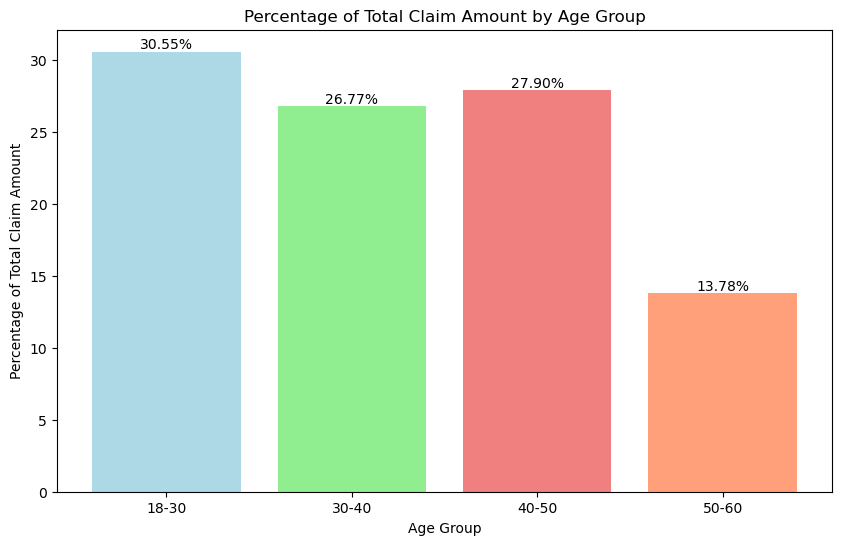

In [12]:
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

total_claim_amount = data['claim'].sum()

age_groups = ['18-30', '30-40', '40-50', '50-60']
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60], labels=age_groups)
total_claim_by_age_group = data.groupby('age_group')['claim'].sum()

percentage_by_age_group = (total_claim_by_age_group / total_claim_amount) * 100

plt.figure(figsize=(10, 6))
plt.bar(percentage_by_age_group.index, percentage_by_age_group.values, color=colors)

for i, percentage in enumerate(percentage_by_age_group):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Total Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Total Claim Amount')
plt.show()

# Conclusion 1:
### As shown in the upper graphs, the wider the distribution of the age range (decades) of the clientele, the higher the percentage of payments in the insurance requirements of that group and vice versa. There is no real effect on the customer's age but on the percentage of customers in that age group.

# Central question 2:
### Are there differences in the amount of insurance claims between smokers and non-smokers? 

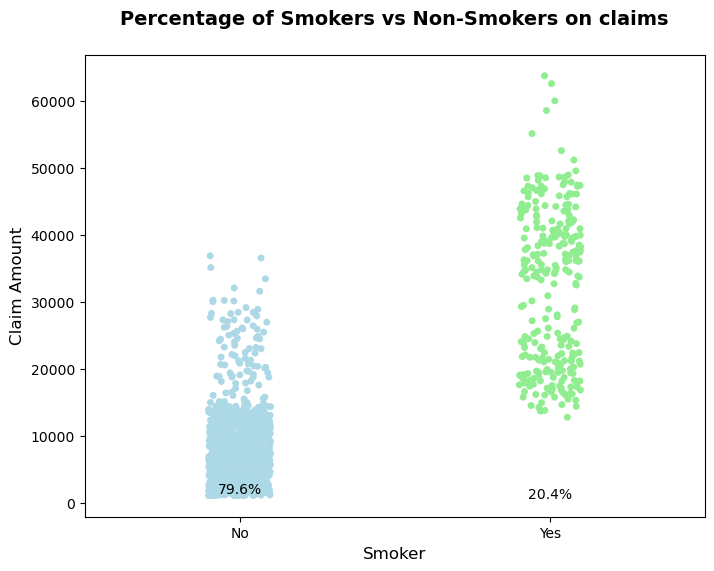

In [13]:
smoker_counts = data['smoker'].value_counts()
total_count = smoker_counts.sum()
smoker_percentages = (smoker_counts / total_count) * 100

plt.figure(figsize=(8, 6))
sns.stripplot(x='smoker', y='claim', data=data, palette=['lightblue', 'lightgreen'])

for i, (x, y) in enumerate(zip(['Non-Smokers', 'Smokers'], smoker_counts.values)):
    plt.text(i, y, f"{smoker_percentages[i]:.1f}%", ha='center', va='bottom')

plt.title('Percentage of Smokers vs Non-Smokers on claims\n', fontsize=14, fontweight='bold')
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)

plt.show()

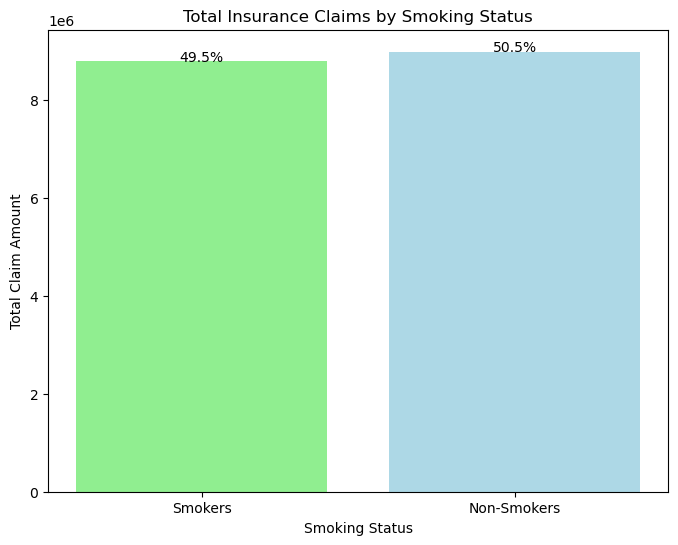

In [14]:
total_claim_smokers = data[data['smoker'] == 'Yes']['claim'].sum()
total_claim_non_smokers = data[data['smoker'] == 'No']['claim'].sum()

total_claim_all = data['claim'].sum()

percentage_smokers = (total_claim_smokers / total_claim_all) * 100
percentage_non_smokers = (total_claim_non_smokers / total_claim_all) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Smokers', 'Non-Smokers'], [total_claim_smokers, total_claim_non_smokers], color=['lightgreen', 'lightblue'])
plt.title('Total Insurance Claims by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Total Claim Amount')
plt.text(0, total_claim_smokers + 5000, f'{percentage_smokers:.1f}%', ha='center')
plt.text(1, total_claim_non_smokers + 5000, f'{percentage_non_smokers:.1f}%', ha='center')
plt.show()

# Conclusion 2:
### The analysis underscores a stark contrast in insurance claim payments between smoking and non-smoking populations. Despite smokers constituting approximately 20% of all customers, they account for around 50% of the total insurance payouts. In contrast, non-smokers, comprising four times the size of the smoking population, receive roughly an equal share of insurance claim payments. This significant disparity underscores the considerable financial burden associated with smoking-related claims, highlighting the imperative for individuals to refrain from smoking to mitigate health risks and financial liabilities.

## Secondary Inquiry:
#### We further investigate the potential correlation between diabetes, smoking habits, and their impact on financial claims?

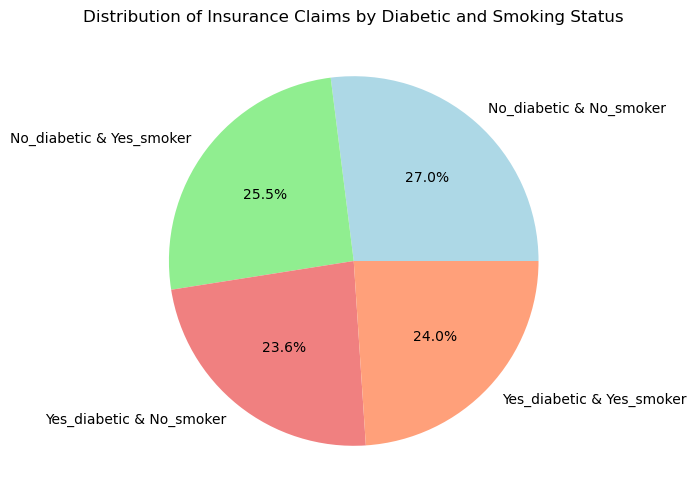

In [15]:
plt.figure(figsize=(8, 6))
data['diabetic_smoker'] = data['diabetic'] +'_diabetic'+ ' & ' + data['smoker']+'_smoker'
data_diabetic_smoker = data.groupby('diabetic_smoker')['claim'].sum()
data_diabetic_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Insurance Claims by Diabetic and Smoking Status')
plt.ylabel('')
plt.show()

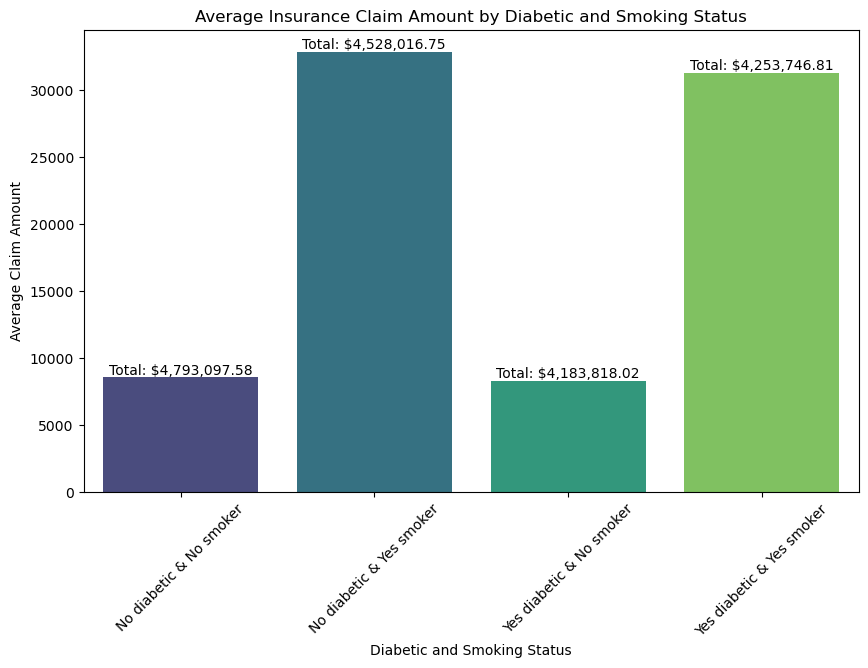

In [16]:
plt.figure(figsize=(10, 6))
data['diabetic_smoker'] = data['diabetic'] + " diabetic"+" & " + data['smoker']+" smoker"

average_claim_by_diabetic_smoker = data.groupby('diabetic_smoker')['claim'].mean()
total_claim_by_diabetic_smoker = data.groupby('diabetic_smoker')['claim'].sum()

sns.barplot(x=average_claim_by_diabetic_smoker.index, y=average_claim_by_diabetic_smoker.values, palette='viridis')

for i, v in enumerate(total_claim_by_diabetic_smoker):
    plt.text(i, average_claim_by_diabetic_smoker.values[i], f'Total: ${v:,.2f}', ha='center', va='bottom')

plt.title('Average Insurance Claim Amount by Diabetic and Smoking Status')
plt.xlabel('Diabetic and Smoking Status')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)
plt.show()

## Conclusion of the Secondary Inquiry:
#### To assess the validity of the assumption regarding diabetic individuals, I partitioned the dataset based on smoking status and diabetes diagnosis. Surprisingly, I observed a consistent distribution across the population groups, with each subgroup constituting approximately 25% of the total. Despite this uniform distribution, smokers continue to receive financial claims at a comparable rate, irrespective of their diabetic status. This uniformity in claim distribution suggests that diabetes does not significantly influence insurance claims in this context. Thus, the analysis underscores the prevailing trend that smokers remain the primary beneficiaries of substantial claim amounts, regardless of diabetic status.

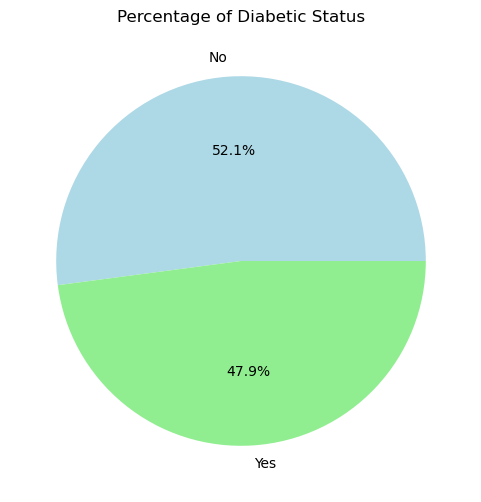

In [17]:
diabetic_counts = data['diabetic'].value_counts()

percentage_diabetic = (diabetic_counts / len(data)) * 100

plt.figure(figsize=(6, 6))
plt.pie(percentage_diabetic, labels=diabetic_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Diabetic Status')
plt.show()

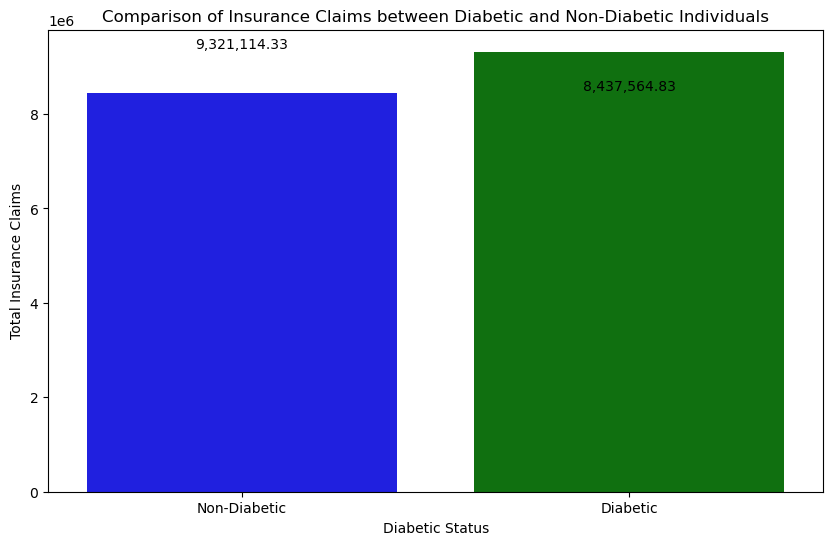

In [18]:
def add_commas(number):
    return "{:,.2f}".format(number)

total_claim_by_diabetic_status = data.groupby('diabetic')['claim'].sum()

plt.figure(figsize=(10, 6))

sns.barplot(x='diabetic', y='claim', data=data, estimator=sum, ci=None, palette=['blue', 'green'])

for i, value in enumerate(total_claim_by_diabetic_status):
    plt.text(i, value, add_commas(value), ha='center', va='bottom')

plt.title('Comparison of Insurance Claims between Diabetic and Non-Diabetic Individuals')
plt.xlabel('Diabetic Status')
plt.ylabel('Total Insurance Claims')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

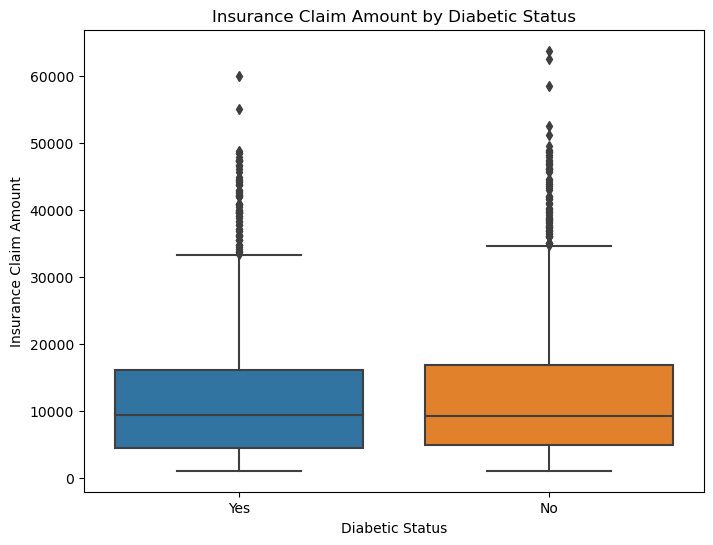

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetic', y='claim', data=data)
plt.title('Insurance Claim Amount by Diabetic Status')
plt.xlabel('Diabetic Status')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Secondary question 3.1:
### Is there a connection between diabetics who also smoke to insurance claims?

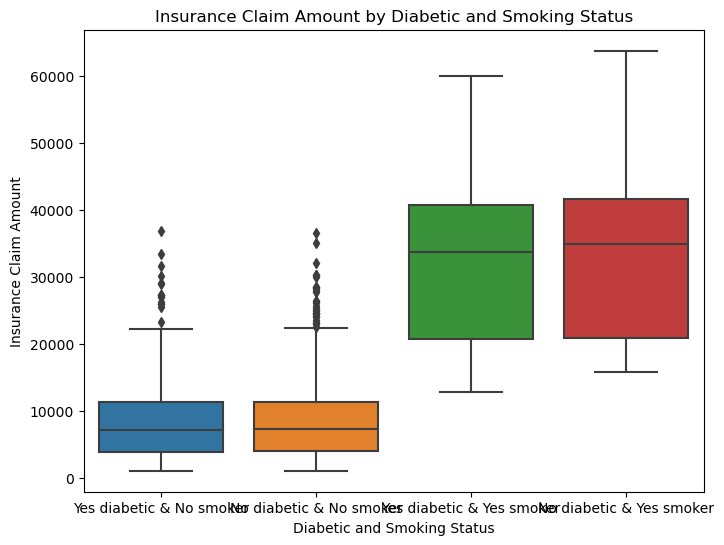

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetic_smoker', y='claim', data=data)
plt.title('Insurance Claim Amount by Diabetic and Smoking Status')
plt.xlabel('Diabetic and Smoking Status')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Conclusion 3.1:
#### The largest proportion of the population consists of non-diabetics who are also non-smokers, accounting for approximately 27% of the total. Interestingly, this group tends to receive the highest insurance payouts, albeit with minimal differences amounting to a few hundred thousand dollars.

#### As observed previously, among smokers, there are occasional instances of receiving larger sums of money compared to other groups.

## Secondary question 3.2:
### Is there a connection between diabetics who are overweight and insurance claims?

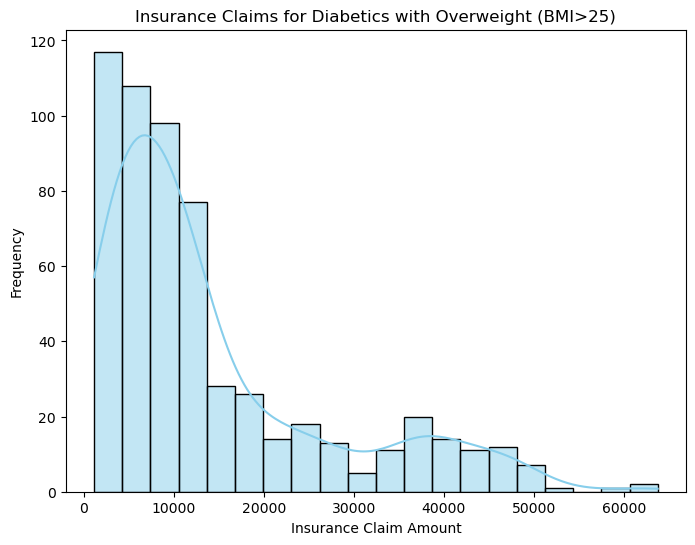

In [21]:
diabetic_overweight_data = data[(data['diabetic'] == 'No') & (data['bmi'] >= 25) ]
plt.figure(figsize=(8, 6))
sns.histplot(diabetic_overweight_data['claim'], bins=20, kde=True, color='skyblue')
plt.title('Insurance Claims for Diabetics with Overweight (BMI>25)')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.show()    

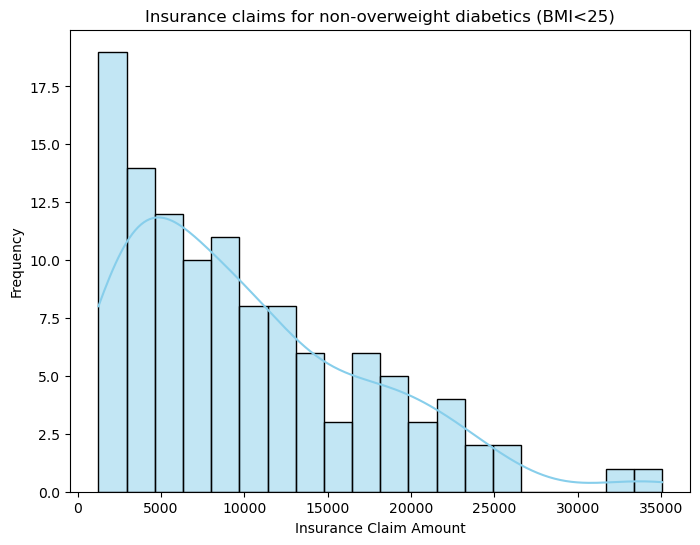

In [22]:
diabetic_overweight_data = data[(data['diabetic'] == 'No') & (data['bmi'] < 25) ]
plt.figure(figsize=(8, 6))
sns.histplot(diabetic_overweight_data['claim'], bins=20, kde=True, color='skyblue')
plt.title('Insurance claims for non-overweight diabetics (BMI<25)')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.show()    

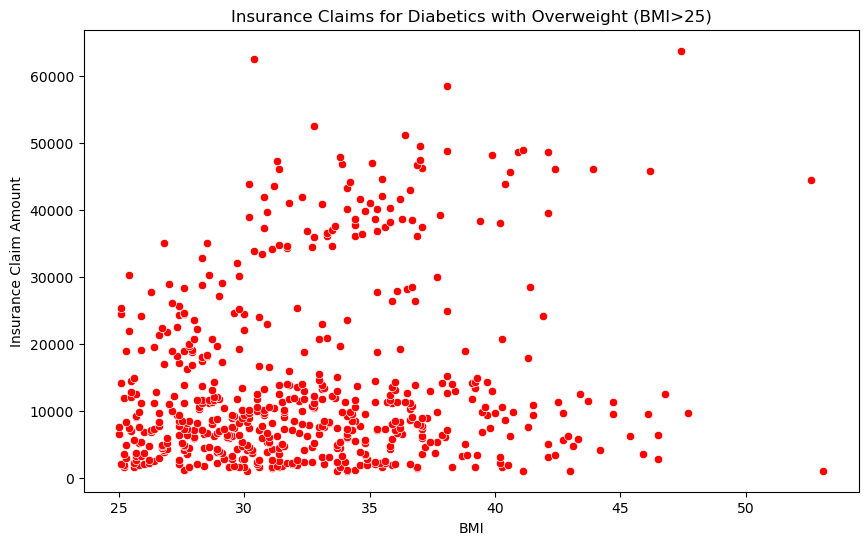

In [23]:
diabetic_overweight_data = data[(data['diabetic'] == 'No') & (data['bmi'] >= 25) ]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=diabetic_overweight_data, color='red')
plt.title('Insurance Claims for Diabetics with Overweight (BMI>25)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

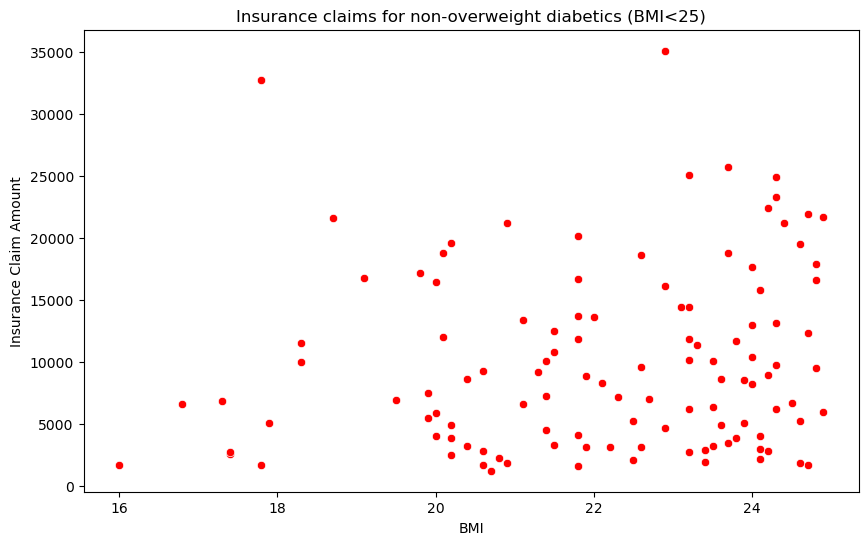

In [24]:
diabetic_overweight_data = data[(data['diabetic'] == 'No') & (data['bmi'] < 25) ]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=diabetic_overweight_data, color='red')
plt.title('Insurance claims for non-overweight diabetics (BMI<25)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Conclusion 3:
### Among the population, the majority, constituting approximately 52.1%, do not have diabetes. Interestingly, this group receives a substantially larger sum of money, almost a million dollars more than individuals with diabetes. This trend persists across various analyses, suggesting a recurring pattern favoring non-diabetic individuals in insurance claims.

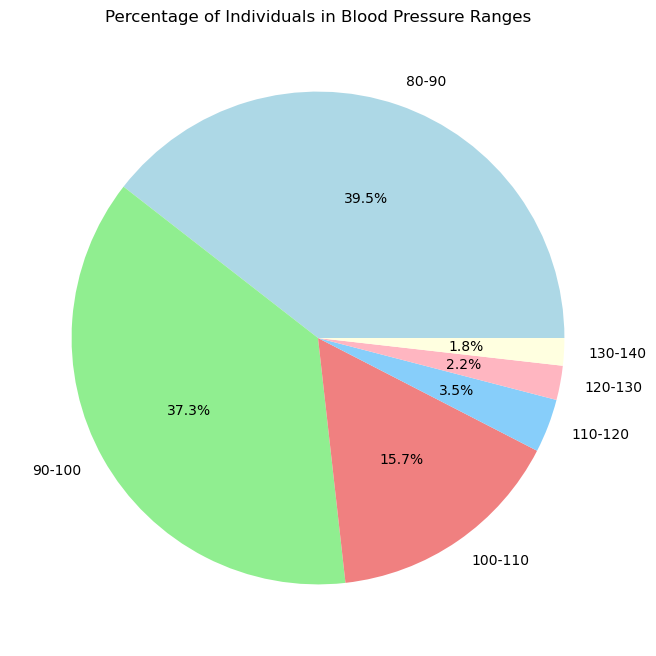

In [25]:
blood_pressure_groups = ['80-90', '90-100', '100-110', '110-120', '120-130', '130-140']
counts = []

for lower, upper in [(80, 90), (90, 100), (100, 110), (110, 120), (120, 130), (130, 140)]:
    count = data[(data['bloodpressure'] >= lower) & (data['bloodpressure'] < upper)].shape[0]
    counts.append(count)

total_count = data.shape[0]
percentages = [(count / total_count) * 100 for count in counts]
 
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=blood_pressure_groups, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow'])
plt.title('Percentage of Individuals in Blood Pressure Ranges')
plt.show()

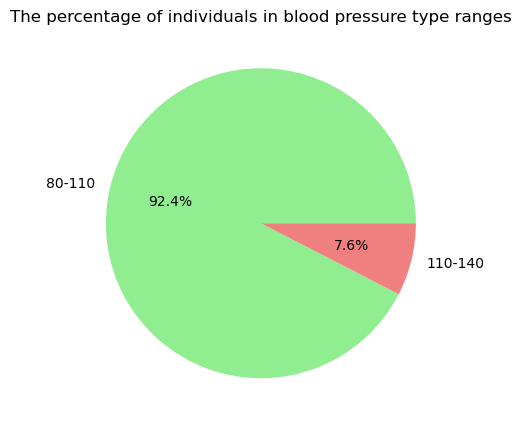

In [26]:
blood_pressure_groups = ['80-110', '110-140']
counts = []

for lower, upper in [(80, 110), (110, 140)]:
    count = data[(data['bloodpressure'] >= lower) & (data['bloodpressure'] < upper)].shape[0]
    counts.append(count)

total_count = data.shape[0]
percentages = [(count / total_count) * 100 for count in counts]
 
plt.figure(figsize=(5, 8))
plt.pie(percentages, labels=blood_pressure_groups, autopct='%1.1f%%', colors=[ 'lightgreen', 'lightcoral'])
plt.title('The percentage of individuals in blood pressure type ranges')
plt.show()

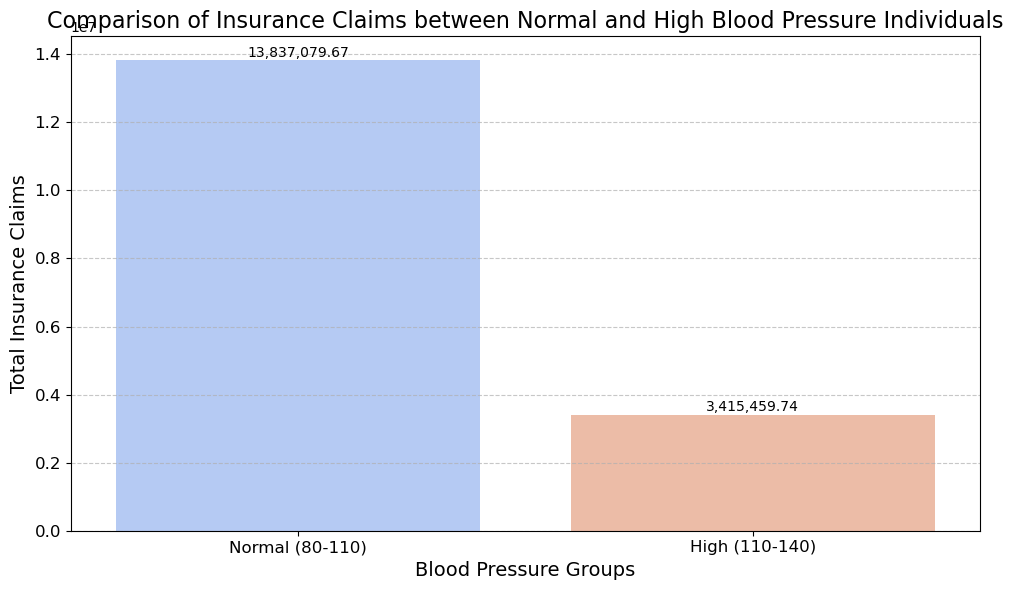

In [27]:
def add_commas(number):
    return "{:,.2f}".format(number)

data['blood_pressure_groups'] = pd.cut(data['bloodpressure'], bins=[80, 110, 140], labels=['Normal (80-110)', 'High (110-140)'])

total_claim_by_blood_pressure = data.groupby('blood_pressure_groups')['claim'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_claim_by_blood_pressure.index, y=total_claim_by_blood_pressure.values, palette='coolwarm')

for i, value in enumerate(total_claim_by_blood_pressure):
    plt.text(i, value + 5000, add_commas(value), ha='center', va='bottom')

plt.title('Comparison of Insurance Claims between Normal and High Blood Pressure Individuals', fontsize=16)
plt.xlabel('Blood Pressure Groups', fontsize=14)
plt.ylabel('Total Insurance Claims', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

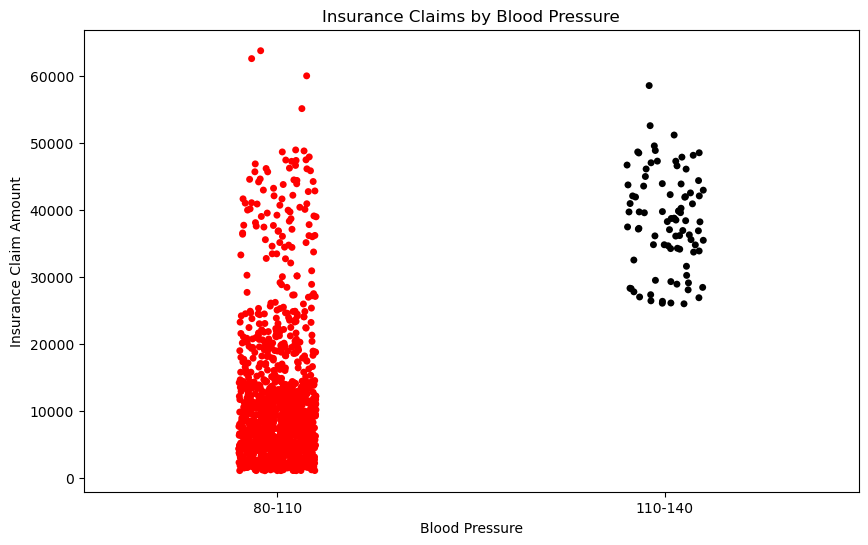

In [28]:
data['blood_pressure_category'] = pd.cut(data['bloodpressure'], bins=[80, 110, 140], labels=blood_pressure_groups)

plt.figure(figsize=(10, 6))
sns.stripplot(x='blood_pressure_category', y='claim', data=data, jitter=True, palette=['red', 'black'])

plt.title('Insurance Claims by Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Insurance Claim Amount')
plt.show()


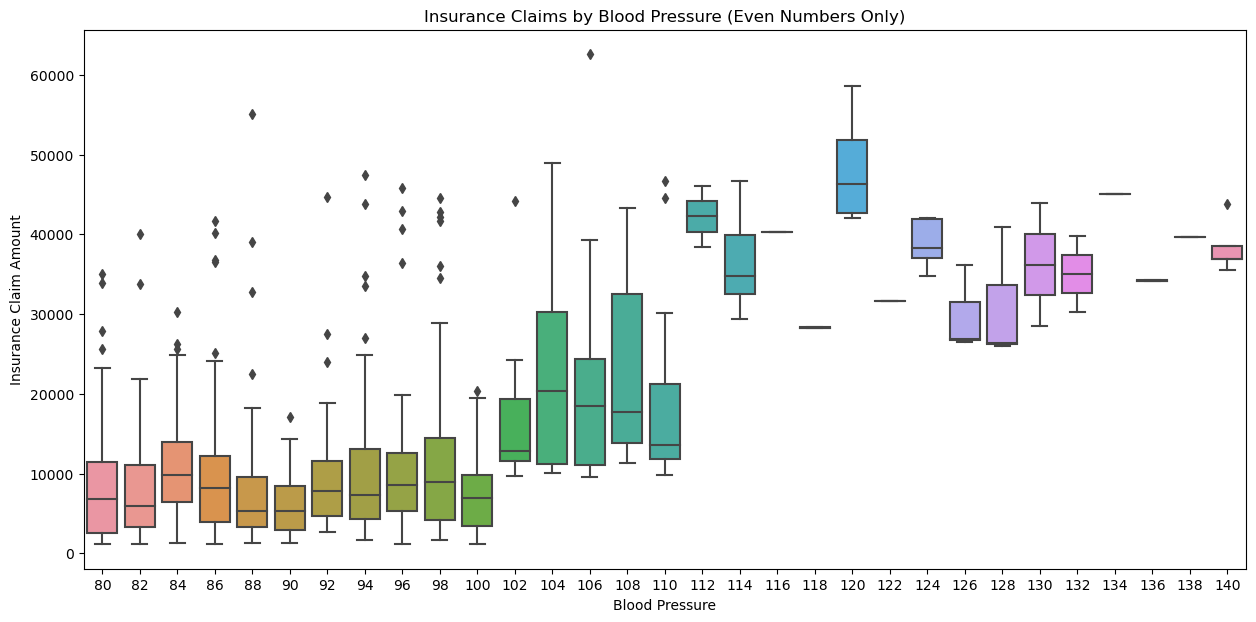

In [29]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='bloodpressure', y='claim', data=data[data['bloodpressure'] % 2 == 0])
plt.title('Insurance Claims by Blood Pressure (Even Numbers Only)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insurance Claim Amount')
plt.show()

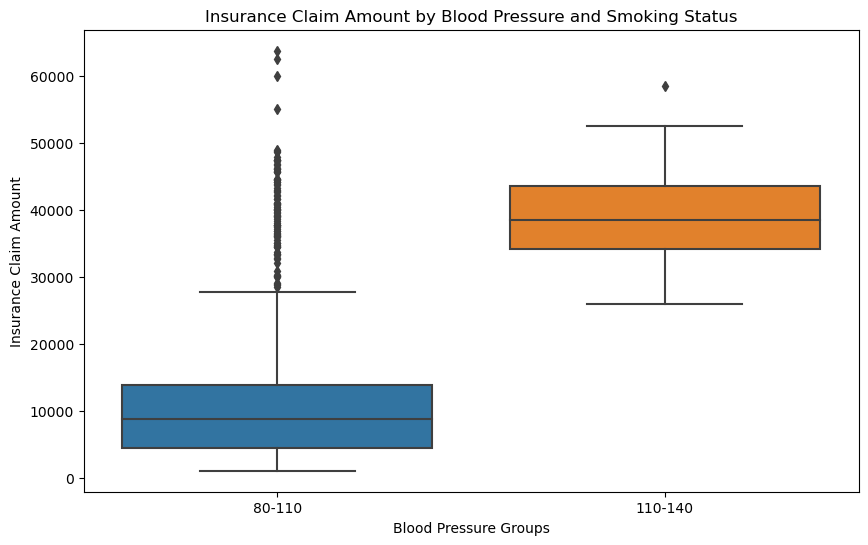

In [30]:
data['bloodpressure'] = pd.to_numeric(data['bloodpressure'], errors='coerce')

blood_pressure_groups = pd.cut(data['bloodpressure'], bins=[80, 110, 140], labels=['80-110', '110-140'])

data['blood_pressure_groups'] = blood_pressure_groups

plt.figure(figsize=(10, 6))
sns.boxplot(x='blood_pressure_groups', y='claim', data=data)
plt.title('Insurance Claim Amount by Blood Pressure and Smoking Status')
plt.xlabel('Blood Pressure Groups')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Secondary question 4.1:
### Is there a connection between high blood pressure and smoking and a larger insurance claim?

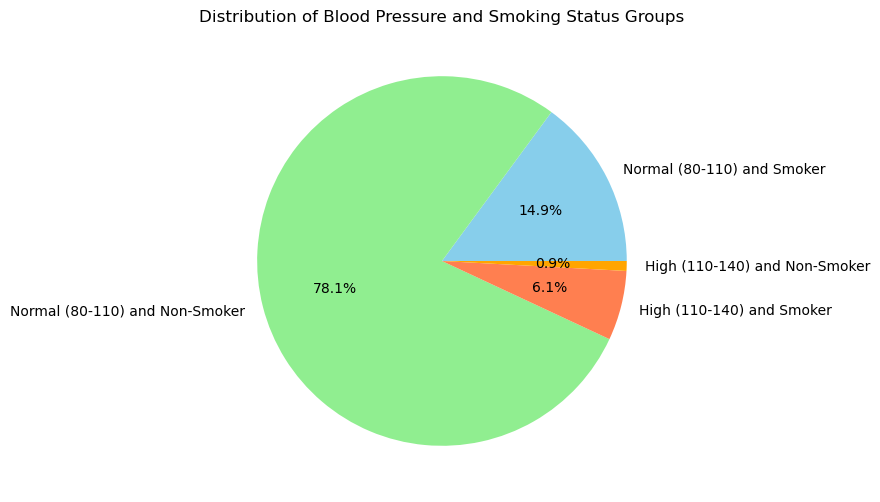

In [31]:
blood_pressure_smoking_counts = {
    'Normal (80-110) and Smoker': len(data[(data['blood_pressure_groups'] == '80-110') & (data['smoker'] == 'Yes')]),
    'Normal (80-110) and Non-Smoker': len(data[(data['blood_pressure_groups'] == '80-110') & (data['smoker'] == 'No')]),
    'High (110-140) and Smoker': len(data[(data['blood_pressure_groups'] == '110-140') & (data['smoker'] == 'Yes')]),
    'High (110-140) and Non-Smoker': len(data[(data['blood_pressure_groups'] == '110-140') & (data['smoker'] == 'No')])
}
plt.figure(figsize=(8, 6))
plt.pie(blood_pressure_smoking_counts.values(), labels=blood_pressure_smoking_counts.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange'])
plt.title('Distribution of Blood Pressure and Smoking Status Groups')
plt.show()


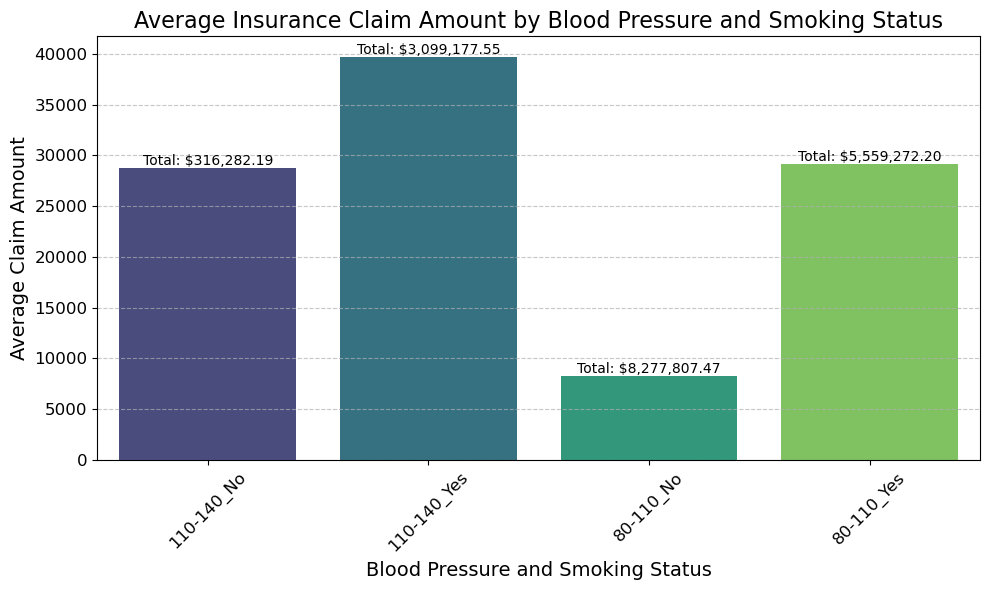

In [32]:
def add_commas(number):
    return "{:,.2f}".format(number)

data['bloodpressure_smoker'] = data['blood_pressure_groups'].astype(str) + '_' + data['smoker']

data.dropna(subset=['bloodpressure_smoker', 'claim'], inplace=True)

average_claim_by_bloodpressure_smoker = data.groupby('bloodpressure_smoker')['claim'].mean()

total_claim_by_bloodpressure_smoker = data.groupby('bloodpressure_smoker')['claim'].sum()

excluded_groups = ['nan_Yes', 'nan_No', 'nan_No']
average_claim_by_bloodpressure_smoker = average_claim_by_bloodpressure_smoker[~average_claim_by_bloodpressure_smoker.index.isin(excluded_groups)]
total_claim_by_bloodpressure_smoker = total_claim_by_bloodpressure_smoker[~total_claim_by_bloodpressure_smoker.index.isin(excluded_groups)]

plt.figure(figsize=(10, 6))
sns.barplot(x=average_claim_by_bloodpressure_smoker.index, y=average_claim_by_bloodpressure_smoker.values, palette='viridis')

for i, v in enumerate(total_claim_by_bloodpressure_smoker):
    plt.text(i, average_claim_by_bloodpressure_smoker.values[i], f'Total: ${v:,.2f}', ha='center', va='bottom')

plt.title('Average Insurance Claim Amount by Blood Pressure and Smoking Status', fontsize=16)
plt.xlabel('Blood Pressure and Smoking Status', fontsize=14)
plt.ylabel('Average Claim Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
    

# Central question 3:
is there a difference in the amount of insurance claims between BMI types?

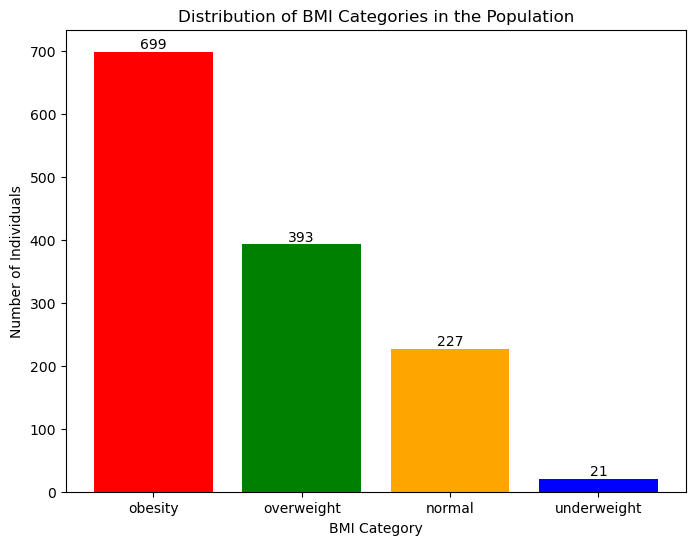

In [33]:
categories = ['obesity', 'overweight', 'normal', 'underweight']
conditions = [(data['bmi'] > 30), ((data['bmi'] > 25) & (data['bmi'] <= 30)), ((data['bmi'] > 18.5) & (data['bmi'] <= 25)), (data['bmi'] <= 18.5)]

counts = [(condition).sum() for condition in conditions]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['red', 'green', 'orange', 'blue'])

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.title('Distribution of BMI Categories in the Population')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.show()

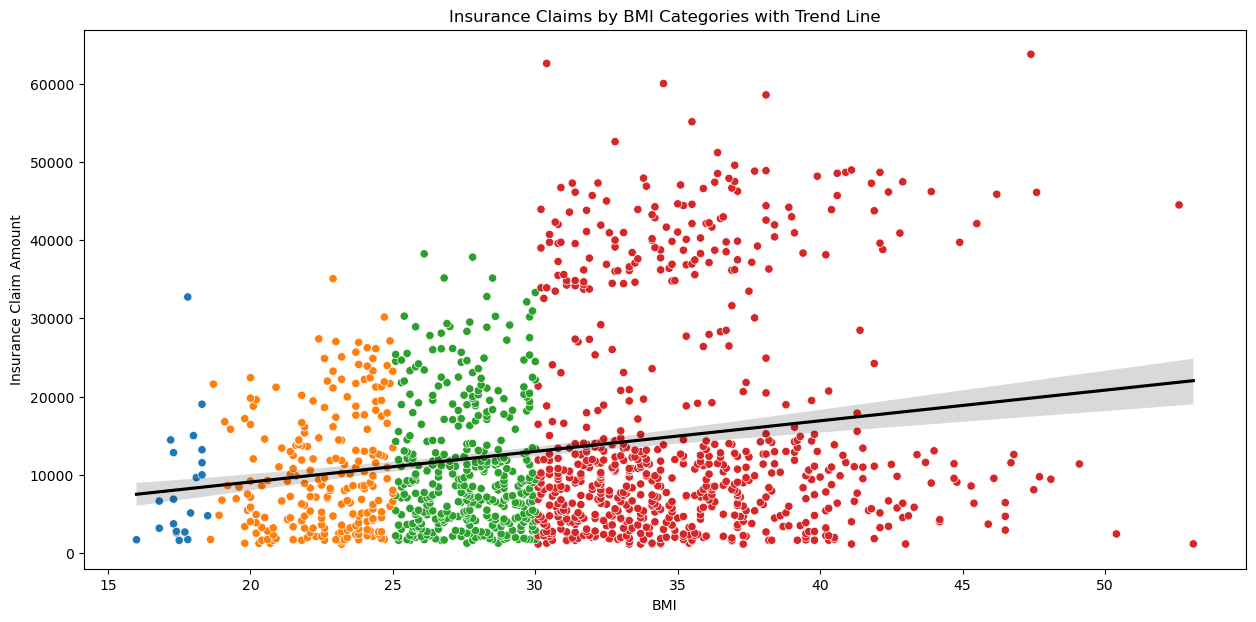

In [34]:
bins = [0, 18.5, 25, 30, float('inf')]
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=categories)
plt.figure(figsize=(15, 7))
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=data, legend=False)
sns.regplot(x='bmi', y='claim', data=data, scatter=False, color='black')
plt.title('Insurance Claims by BMI Categories with Trend Line')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

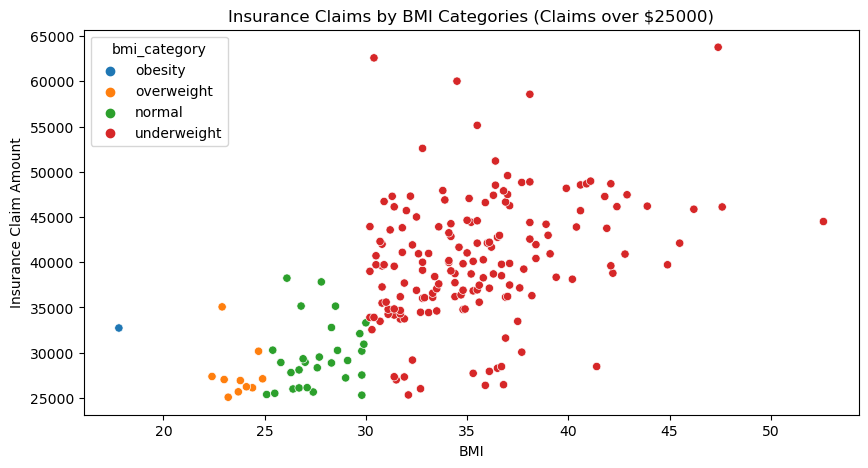

In [35]:
plt.figure(figsize=(10, 5))
high_claim_data = data[data['claim'] > 25000]
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=high_claim_data)
plt.title('Insurance Claims by BMI Categories (Claims over $25000)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Conclusion 3:
#### The analysis reveals a clear correlation between weight and the magnitude of insurance claims. Individuals with higher BMI tend to file larger claims, indicating a direct relationship between weight and claim amount. Notably, outliers with higher-than-average weight contribute significantly to this trend, resulting in escalated claim amounts. The trend line further illustrates this relationship, showing a positive slope where higher BMI values correspond to increased claim amounts. Additionally, the widening standard deviations at higher BMI levels signify greater variability in claim amounts, emphasizing the financial impact of weight-related factors on insurance claims.

# Central question 4:
#### Is there a difference in the amount of insurance claims between men and women?

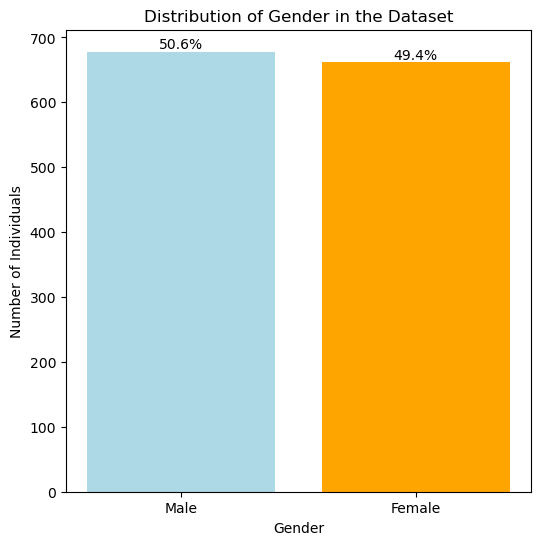

In [36]:
male_count = (data['gender'] == 'male').sum()
female_count = (data['gender'] == 'female').sum()

total_count = male_count + female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

plt.figure(figsize=(6, 6))
bars = plt.bar(['Male', 'Female'], [male_count, female_count], color=['lightblue', 'orange'])
plt.text(0, male_count, f"{male_percentage:.1f}%", ha='center', va='bottom')
plt.text(1, female_count, f"{female_percentage:.1f}%", ha='center', va='bottom')
plt.title('Distribution of Gender in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.show()

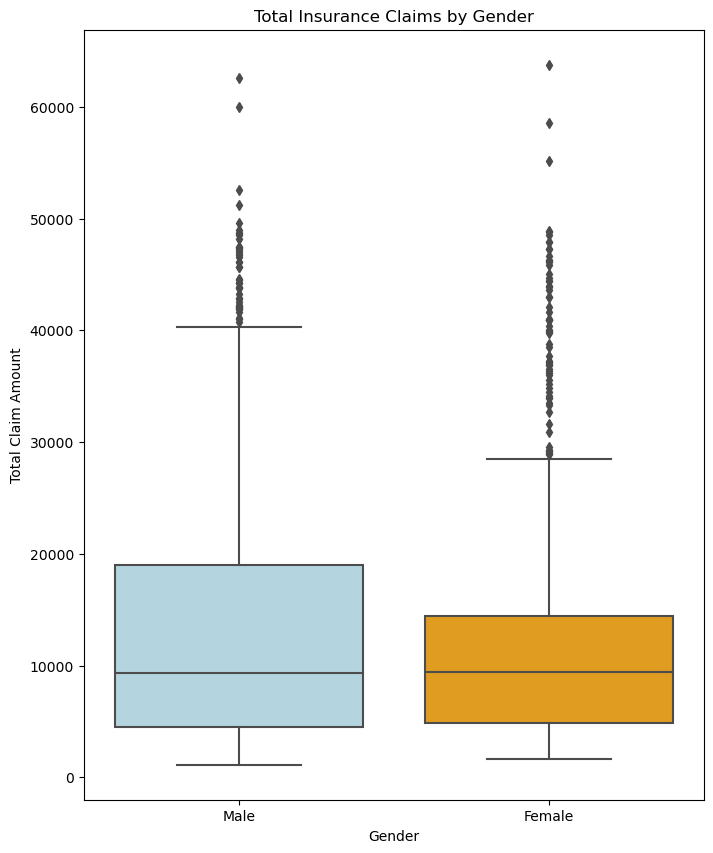

In [38]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='gender', y='claim', data=data, palette=['lightblue', 'orange'])
plt.title('Total Insurance Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

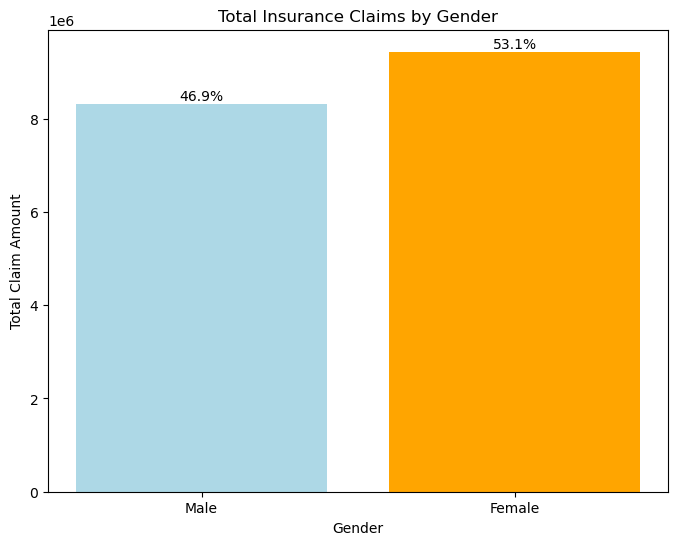

In [37]:
total_claim_by_gender = data.groupby('gender')['claim'].sum()

total_claim_amount = total_claim_by_gender.sum()

gender_percentages = (total_claim_by_gender / total_claim_amount) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(total_claim_by_gender.index, total_claim_by_gender.values, color=['lightblue', 'orange'])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{gender_percentages[i]:.1f}%", ha='center', va='bottom')

plt.title('Total Insurance Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

# Conclusion 4:
#### During the testing of the assumption about men and women, I suddenly realized that there is a stable perception between the population groups, with each group making up about 50% of the total. Surprisingly, despite this even distribution, women continue to receive financial claims at a similar rate. Therefore, the analysis highlights the existing trend that there are even fewer women than men in a very small amount who receive the largest amounts in insurance claims.

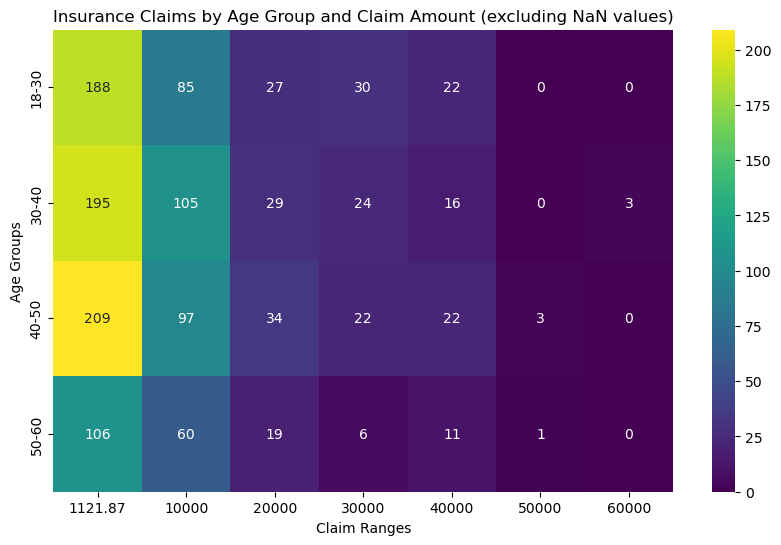

In [39]:
age_groups = ['18-30', '30-40', '40-50', '50-60']
claim_ranges = [data["claim"].min(), 10000, 20000, 30000, 40000, 50000,60000, 70000]

counts = []
for age_lower, age_upper in [(18, 30), (30, 40), (40, 50), (50, 60)]:
    age_group_counts = []
    for claim_lower, claim_upper in zip(claim_ranges[:-1], claim_ranges[1:]):
        count = data.dropna(subset=['age', 'claim']).loc[
                    (data['age'] >= age_lower) & (data['age'] < age_upper) & 
                    (data['claim'] >= claim_lower) & (data['claim'] < claim_upper)].shape[0]
        age_group_counts.append(count)
    counts.append(age_group_counts)

counts_array = np.array(counts)

plt.figure(figsize=(10, 6))
sns.heatmap(counts_array, annot=True, fmt='d', cmap='viridis', xticklabels=claim_ranges[:-1], yticklabels=age_groups)
plt.xlabel('Claim Ranges')
plt.ylabel('Age Groups')
plt.title('Insurance Claims by Age Group and Claim Amount (excluding NaN values)')
plt.show()

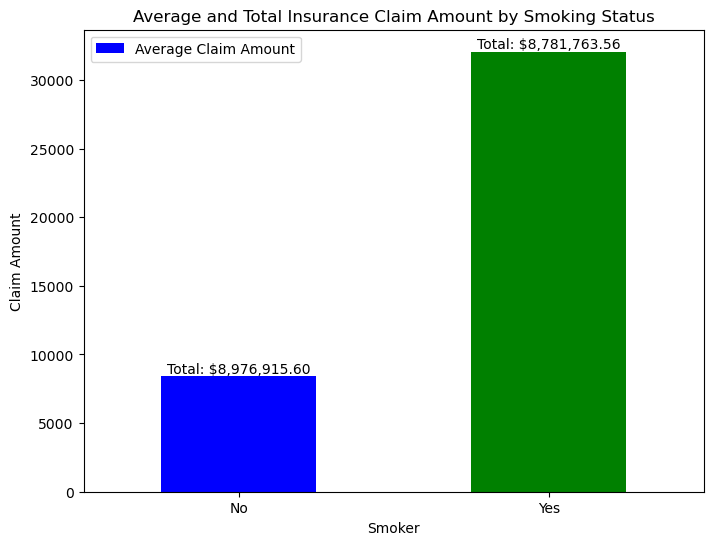

In [40]:
plt.figure(figsize=(8, 6))

claim_stats_by_smoker = data.groupby('smoker')['claim'].agg(['mean', 'sum'])

ax = claim_stats_by_smoker['mean'].plot(kind='bar', color=['blue', 'green'])

for i, v in enumerate(claim_stats_by_smoker['sum']):
    ax.text(i, claim_stats_by_smoker['mean'][i], f'Total: ${v:,.2f}', ha='center', va='bottom')

plt.title('Average and Total Insurance Claim Amount by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Claim Amount')
plt.xticks(rotation=0)
plt.legend(['Average Claim Amount'])
plt.show()

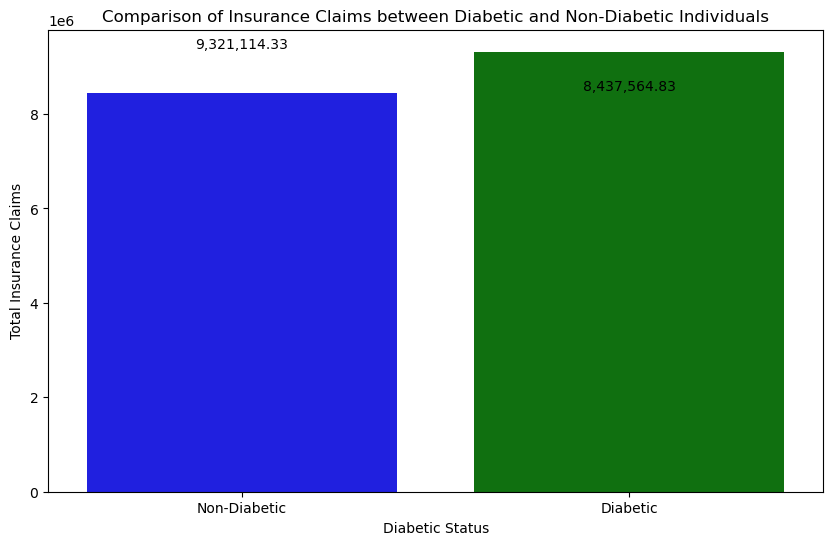

In [41]:
def add_commas(number):
    return "{:,.2f}".format(number)

total_claim_by_diabetic_status = data.groupby('diabetic')['claim'].sum()

plt.figure(figsize=(10, 6))

sns.barplot(x='diabetic', y='claim', data=data, estimator=sum, ci=None, palette=['blue', 'green'])

for i, value in enumerate(total_claim_by_diabetic_status):
    plt.text(i, value, add_commas(value), ha='center', va='bottom')

plt.title('Comparison of Insurance Claims between Diabetic and Non-Diabetic Individuals')
plt.xlabel('Diabetic Status')
plt.ylabel('Total Insurance Claims')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

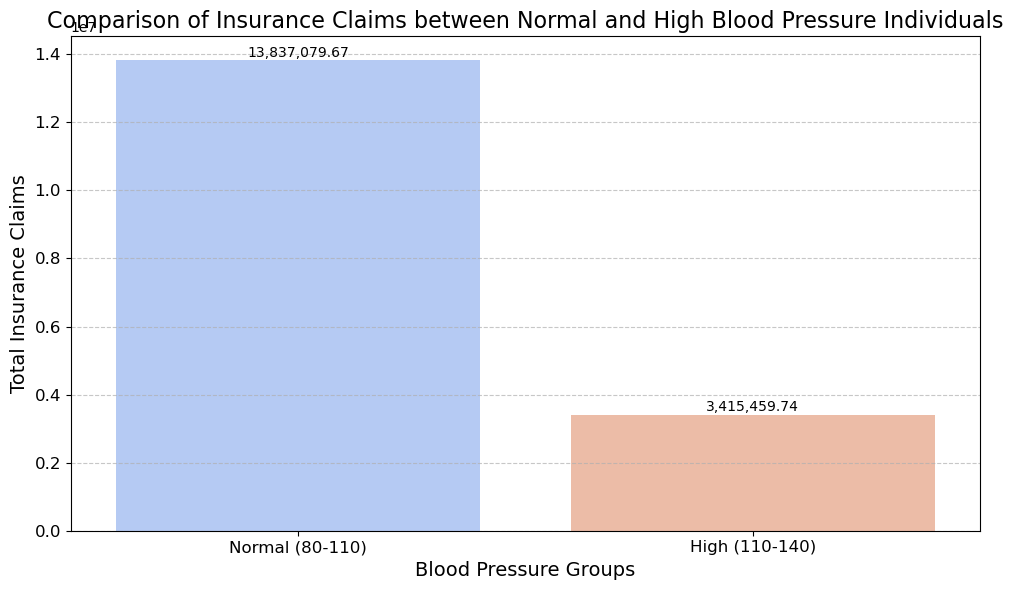

In [42]:
def add_commas(number):
    return "{:,.2f}".format(number)

data['blood_pressure_groups'] = pd.cut(data['bloodpressure'], bins=[80, 110, 140], labels=['Normal (80-110)', 'High (110-140)'])

total_claim_by_blood_pressure = data.groupby('blood_pressure_groups')['claim'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_claim_by_blood_pressure.index, y=total_claim_by_blood_pressure.values, palette='coolwarm')

for i, value in enumerate(total_claim_by_blood_pressure):
    plt.text(i, value + 5000, add_commas(value), ha='center', va='bottom')

plt.title('Comparison of Insurance Claims between Normal and High Blood Pressure Individuals', fontsize=16)
plt.xlabel('Blood Pressure Groups', fontsize=14)
plt.ylabel('Total Insurance Claims', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

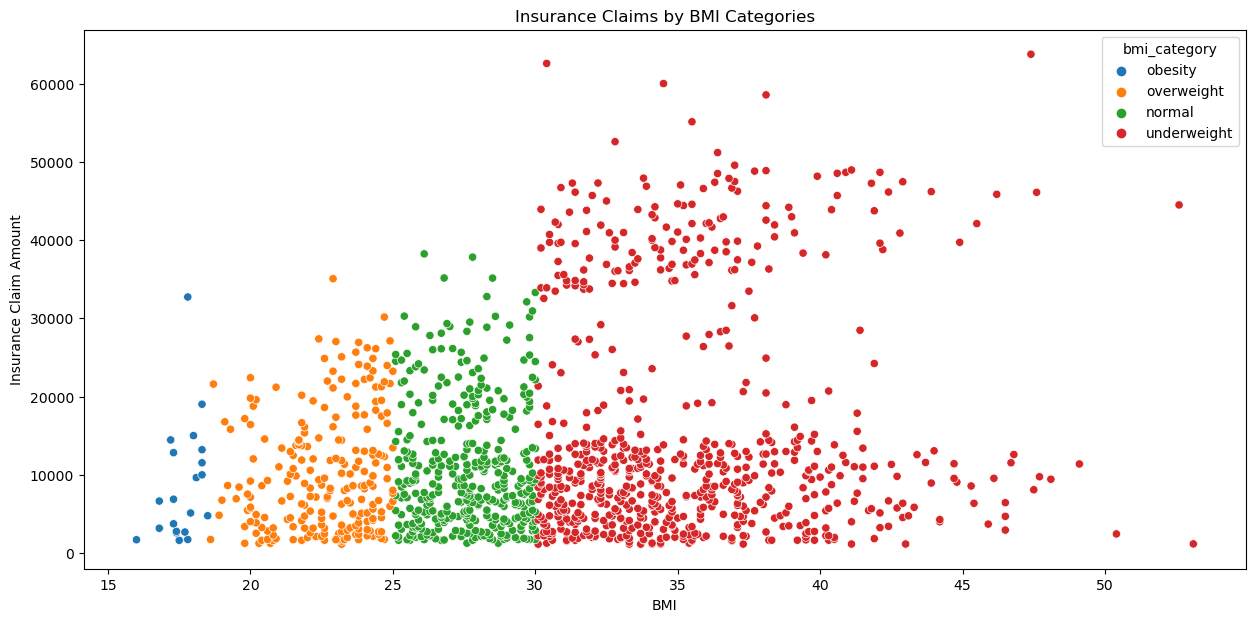

In [43]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=data)
plt.title('Insurance Claims by BMI Categories')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

## According to the findings, it seems that people who place themselves in the obsessively defined group of a BMI that is greater than 20, have diabetes and smoke receive the most insurance claims and also receive the largest amounts. These findings indicate the importance of insurance to deal with the needs of people placed in this group. Therefore, it is recommended to take seriously the financial and security needs of this audience and consider creating insurance solutions that are more suitable for their special needs.